# USED CARS DETAIL ANALYSIS BY PYTHON

In [146]:
import sys
sys.version

'3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plts
import seaborn as sea
import warnings
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv('cars.csv')
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [4]:
df.columns

Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [5]:
df.isnull().sum()

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [16]:
df['Kilometers_Driven'].fillna(df['Kilometers_Driven'].median(),inplace=True)
df['Engine'].fillna(df['Engine'].median(),inplace=True)
df['Power'].fillna(df['Power'].mode()[0],inplace=True)
df['Seats'].fillna(df['Seats'].mean(),inplace=True)

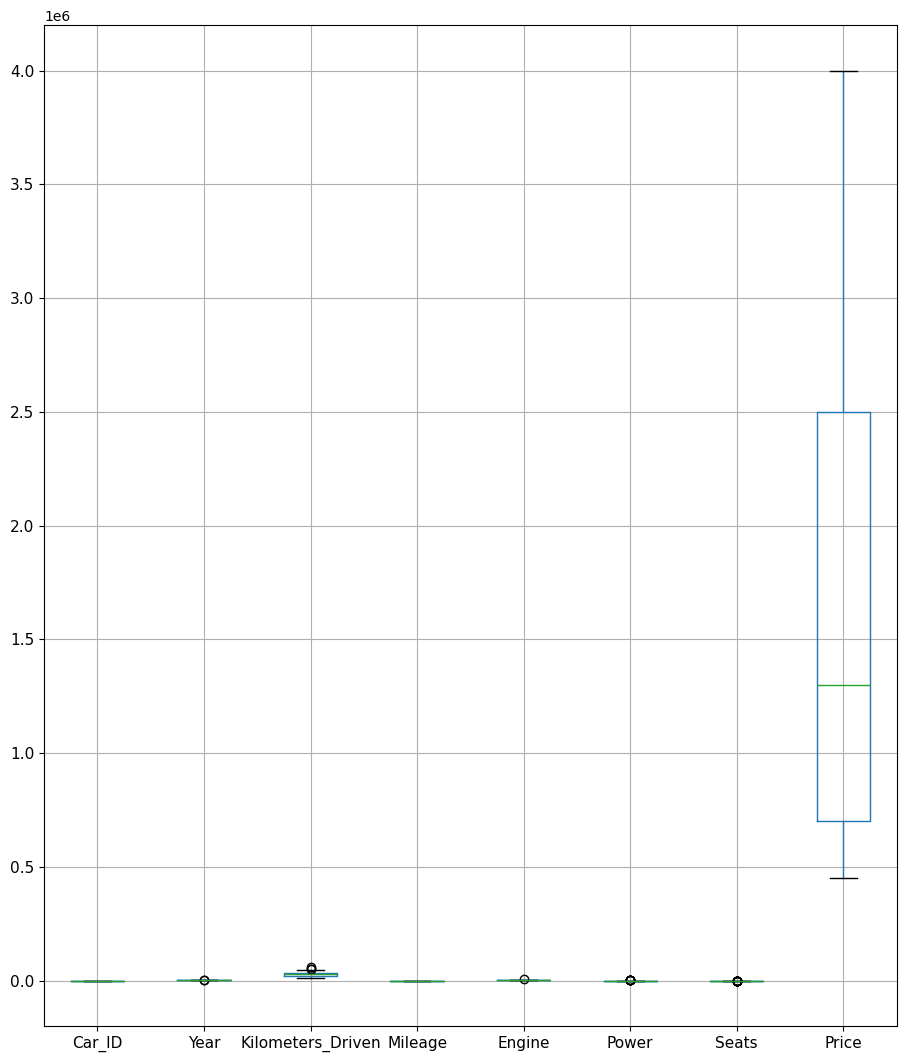

In [18]:
df.boxplot(fontsize=11,figsize=(11,13))
plts.show()

In [20]:
df_cat=df.select_dtypes(include=object)
df_num=df.select_dtypes(exclude=object)

In [22]:
df_num.dtypes

Car_ID               int64
Year                 int64
Kilometers_Driven    int64
Mileage              int64
Engine               int64
Power                int64
Seats                int64
Price                int64
dtype: object

In [24]:
df_num=df_num.astype(int)

In [26]:
df_cat.dtypes

Brand           object
Model           object
Fuel_Type       object
Transmission    object
Owner_Type      object
dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
df_cat['Brand']=le.fit_transform(df_cat['Brand'])
df_cat['Model']=le.fit_transform(df_cat['Model'])
df_cat['Owner_Type']=le.fit_transform(df_cat['Owner_Type'])
df_cat['Transmission']=le.fit_transform(df_cat['Transmission'])
df_cat['Fuel_Type']=le.fit_transform(df_cat['Fuel_Type'])

In [32]:
df=pd.concat([df_cat,df_num],axis=1)

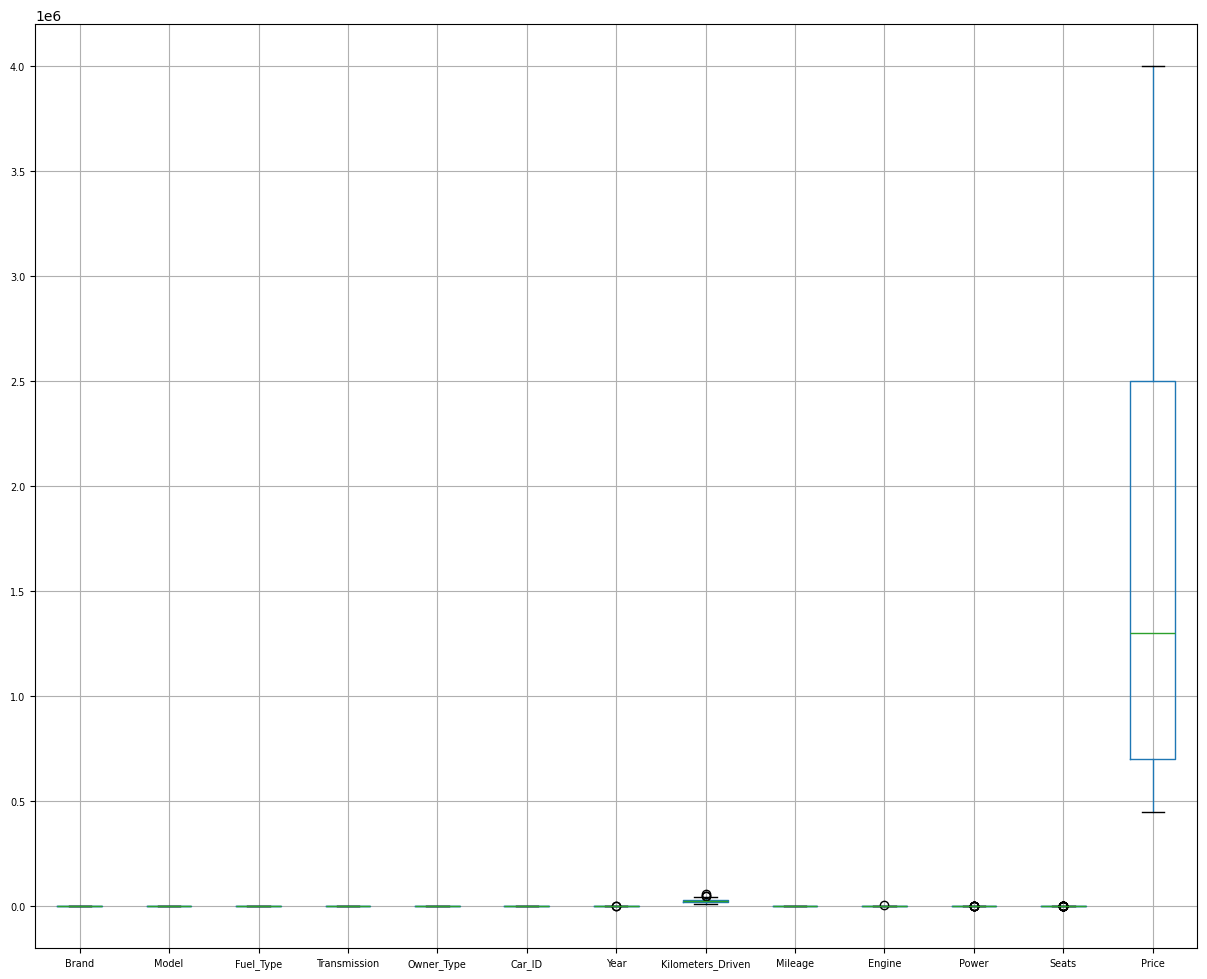

In [34]:
df.boxplot(figsize=(15,12),fontsize=7)
plts.show()

<font size = '5'> Detect and remove outliers in Kilometers_Driven using IQR method.</fontsize>

In [37]:
q1=df['Kilometers_Driven'].quantile(0.25)
q3=df['Kilometers_Driven'].quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr

df_outlier=df[['Kilometers_Driven']][(df['Kilometers_Driven']>LL)&(df['Kilometers_Driven']<Ul)]

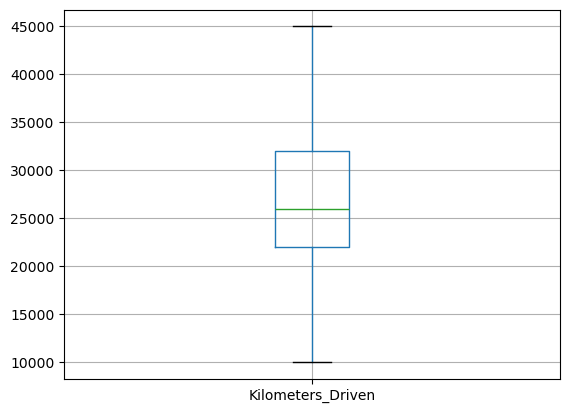

In [39]:
df_outlier.boxplot()
plts.show()

<font size = '5'> Detect and remove outliers in 'YEAR' using IQR method.</fontsize>

In [42]:
q1=df['Year'].quantile(0.25)
q3=df['Year'].quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr
df_outlier1=df[['Year']][(df['Year']>LL)&(df['Year']<Ul)]

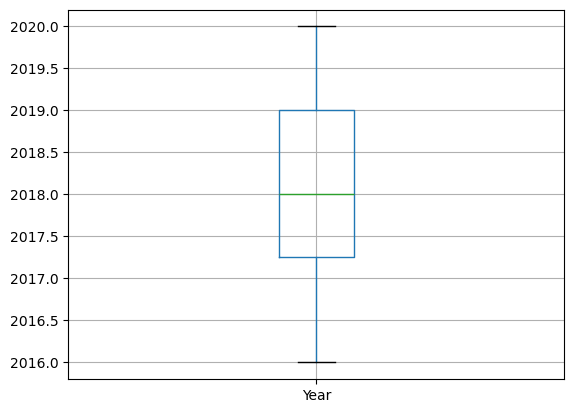

In [44]:
df_outlier1.boxplot()
plts.show()


## HEATMAP

In [46]:
Q1=df[['Price']].quantile(0.25)
Q1
Q3=df[['Price']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price=(df[['Price']][(df[['Price']]>LL)&(df[['Price']]<UL)])

In [48]:
Q1=df2_Price.quantile(0.25)
Q1
Q3=df2_Price.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price1=(df[['Price']][(df2_Price>LL)&(df2_Price<UL)])

In [50]:
Q1=df2_Price1.quantile(0.25)
Q1
Q3=df2_Price1.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price2=(df[['Price']][(df2_Price1>LL)&(df2_Price1<UL)])

In [52]:
Q1=df2_Price2.quantile(0.25)
Q1
Q3=df2_Price2.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price3=(df[['Price']][(df2_Price2>LL)&(df2_Price2<UL)])

In [54]:
Q1=df2_Price3.quantile(0.25)
Q1
Q3=df2_Price3.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price4=(df[['Price']][(df2_Price3>LL)&(df2_Price3<UL)])

In [56]:
Q1=df2_Price4.quantile(0.25)
Q1
Q3=df2_Price4.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price5=(df[['Price']][(df2_Price4>LL)&(df2_Price4<UL)])

In [58]:
Q1=df2_Price5.quantile(0.25)
Q1
Q3=df2_Price5.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price6=(df[['Price']][(df2_Price5>LL)&(df2_Price5<UL)])

In [62]:
Q1=df2_Price6.quantile(0.25)
Q1
Q3=df2_Price6.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price7=(df[['Price']][(df2_Price6>LL)&(df2_Price6<UL)])

In [64]:
Q1=df2_Price7.quantile(0.25)
Q1
Q3=df2_Price7.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price8=(df[['Price']][(df2_Price7>LL)&(df2_Price7<UL)])

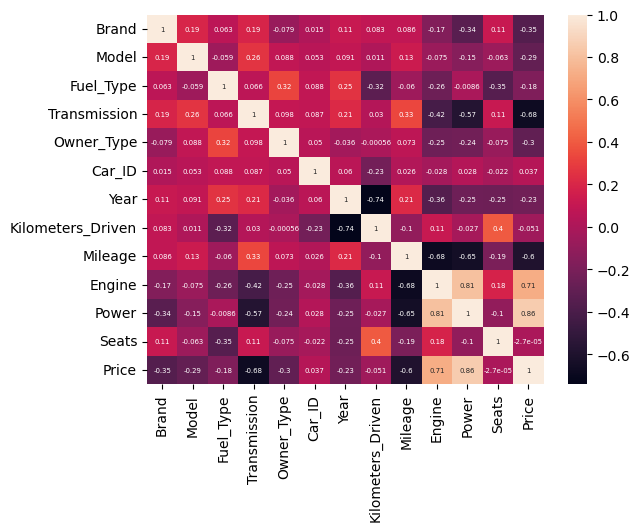

In [68]:
sea.heatmap(df.corr(),annot=True,annot_kws={'fontsize':5})
plts.show()

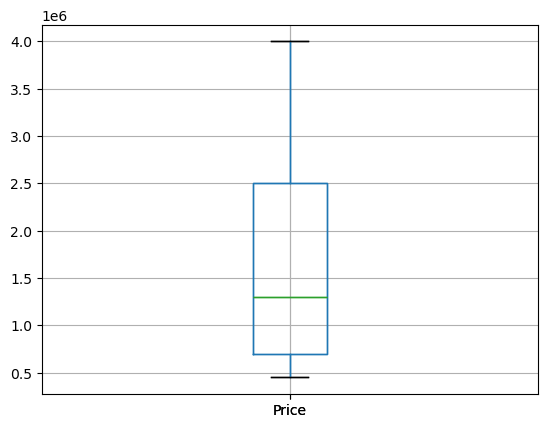

In [74]:
df_price=df[['Price']]
df_price.boxplot()
plts.show()

In [80]:
df_num=pd.concat([df_cat,df_outlier1,df_price,df2_Price8,df[['Power']],df[['Car_ID']],df[['Mileage']]],axis=1)

In [82]:
df_num

,Brand,Model,Fuel_Type,Transmission,Owner_Type,Year,Price,Price,Power,Car_ID,Mileage
0,9,15,1,1,0,2018.0,800000,800000,108,1,15
1,3,14,1,0,1,2019.0,1000000,1000000,140,2,17
2,2,30,1,0,0,2017.0,2500000,2500000,395,3,10
3,6,42,0,1,2,2020.0,600000,600000,74,4,23
4,4,41,0,0,1,2016.0,850000,850000,194,5,18
...,...,...,...,...,...,...,...,...,...,...,...
95,7,11,0,0,0,2019.0,2900000,2900000,191,96,16
96,9,29,0,1,1,2017.0,1400000,1400000,171,97,13
97,2,18,1,1,2,2018.0,750000,750000,121,98,18
98,4,50,1,0,1,2019.0,850000,850000,113,99,17


In [84]:
df_num.isnull().sum()

Brand           0
Model           0
Fuel_Type       0
Transmission    0
Owner_Type      0
Year            2
Price           0
Price           0
Power           0
Car_ID          0
Mileage         0
dtype: int64

In [86]:
df_num.dtypes

Brand             int32
Model             int32
Fuel_Type         int32
Transmission      int32
Owner_Type        int32
Year            float64
Price             int32
Price             int32
Power             int32
Car_ID            int32
Mileage           int32
dtype: object

In [92]:
df_num.dropna(subset=['Year'],inplace=True)

In [94]:
df_num.isnull().sum()

Brand           0
Model           0
Fuel_Type       0
Transmission    0
Owner_Type      0
Year            0
Price           0
Price           0
Power           0
Car_ID          0
Mileage         0
dtype: int64

In [96]:
df_num=df_num.astype(int)

In [98]:
df3_Price=df_num[['Price']]

In [100]:
df_num.drop(columns='Price',inplace=True)

In [102]:
df.columns

Index(['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Car_ID',
       'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [104]:
df1=pd.concat([df_num,df3_Price],axis=1)

In [106]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_stand=pd.DataFrame(ss.fit_transform(df1),columns=df1.columns)

In [108]:
df_stand.isnull().sum()

Brand           0
Model           0
Fuel_Type       0
Transmission    0
Owner_Type      0
Year            0
Power           0
Car_ID          0
Mileage         0
Price           0
Price           0
dtype: int64

In [110]:
df.isnull().sum()

Brand                0
Model                0
Fuel_Type            0
Transmission         0
Owner_Type           0
Car_ID               0
Year                 0
Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

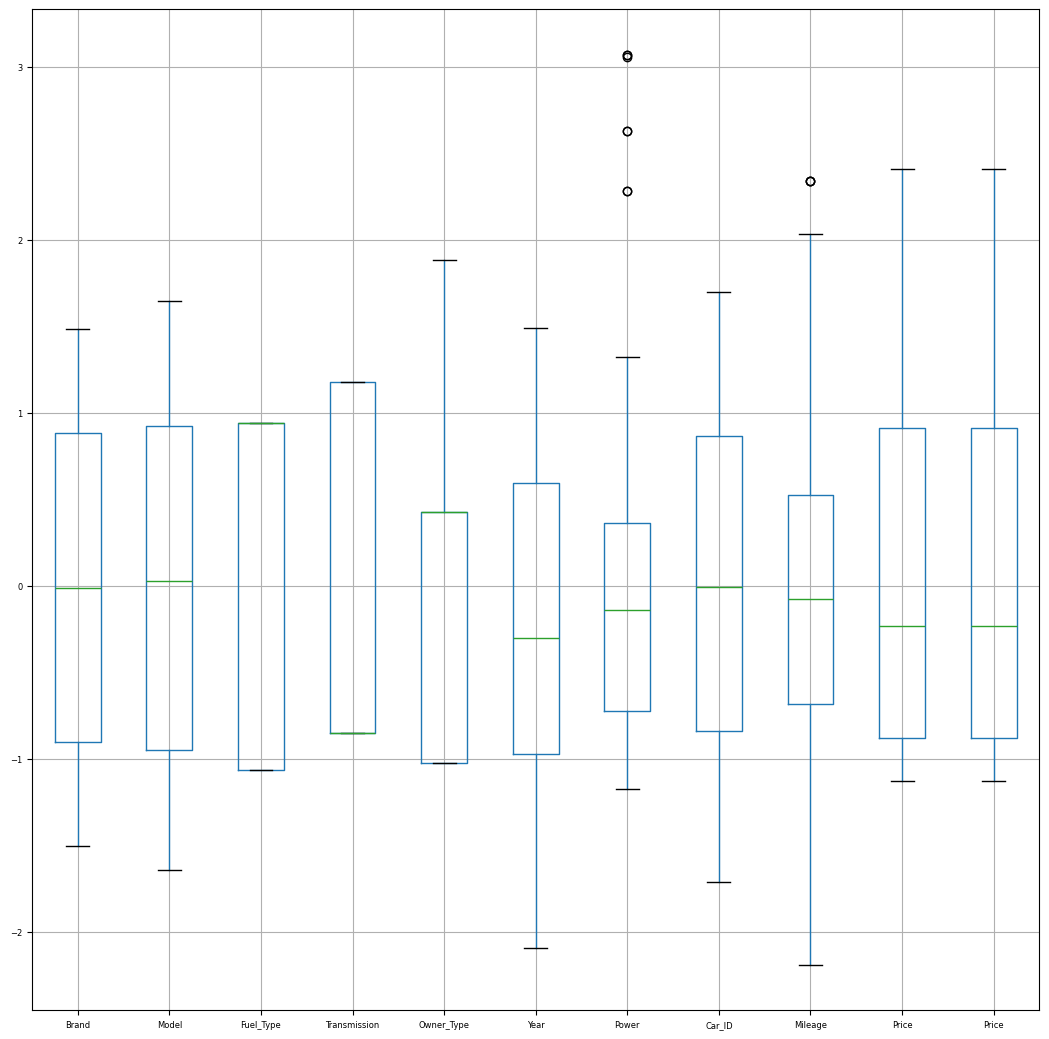

In [118]:
df_stand.boxplot(fontsize=6,figsize=(13,13))
plts.show()

In [130]:
x=df_stand[['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Year', 'Power', 'Car_ID', 'Mileage']]
y=df_stand['Price']

In [132]:
print(df_stand.columns)

Index(['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Year',
       'Power', 'Car_ID', 'Mileage', 'Price', 'Price'],
      dtype='object')


In [134]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [136]:
model.fit(x,y)

LinearRegression()

In [138]:
y_predicted=pd.DataFrame(model.predict(x))

In [140]:
model.score(x,y)

0.847758558952759

In [142]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_predicted)

0.15224144104724108

In [144]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,y_predicted)

0.29793866350571596